In [1]:

import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv(r'OneDrive\Desktop\Shruthi\data_updated.csv')

In [4]:
dataset.head()

,Date,day,month,year,price
0,07-01-1997,7,1,1997,3.82
1,08-01-1997,8,1,1997,3.80
2,09-01-1997,9,1,1997,3.61
3,10-01-1997,10,1,1997,3.92
4,13-01-1997,13,1,1997,4.00


In [5]:

dataset.isnull().any()

Date     False
day      False
month    False
year     False
price     True
dtype: bool

In [6]:
dataset['price'].fillna(dataset['price'].mean(),inplace=True)


In [7]:

dataset.isnull().any()

Date     False
day      False
month    False
year     False
price    False
dtype: bool

In [8]:

x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,4:5].values #outputsrice only

In [9]:
x

array([[   7,    1, 1997],
       [   8,    1, 1997],
       [   9,    1, 1997],
       ...,
       [  15,    5, 2020],
       [  22,    5, 2020],
       [  29,    5, 2020]], dtype=int64)

In [10]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [1.63],
       [1.78],
       [1.76]])

In [11]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape

(4450, 3)

In [13]:
x_test.shape

(1113, 3)

In [14]:
dataset.describe()


,day,month,year,price
count,5563.000000,5563.000000,5563.000000,5563.000000
mean,15.708790,6.483552,2007.633112,4.307914
std,8.740374,3.413840,6.416366,2.206769
min,1.000000,1.000000,1997.000000,1.050000
25%,8.000000,4.000000,2002.000000,2.760000
50%,16.000000,6.000000,2008.000000,3.690000
75%,23.000000,9.000000,2013.000000,5.430000
max,31.000000,12.000000,2020.000000,18.480000


No handles with labels found to put in legend.


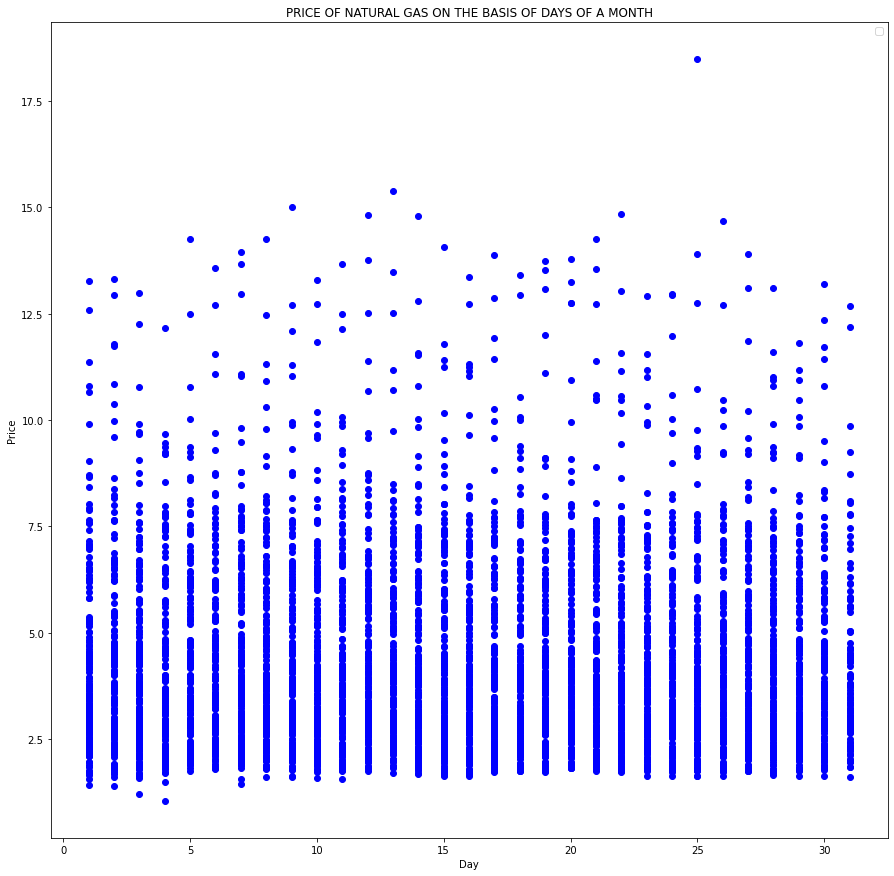

In [15]:

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,15))
plt.scatter(dataset['day'],dataset['price'],color='blue')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No handles with labels found to put in legend.


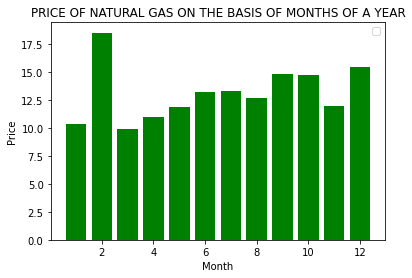

In [16]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

No handles with labels found to put in legend.


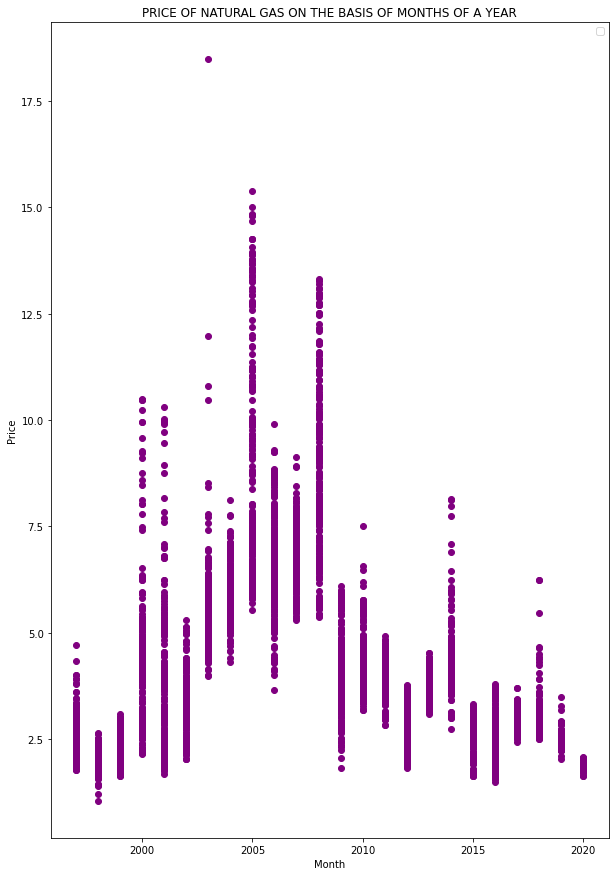

In [19]:
fig=plt.figure(figsize=(10,15))
plt.scatter(dataset['year'],dataset['price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=3,criterion='mse',max_depth=10)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=3)

In [21]:
import pickle
pickle.dump(dtr,open('pricenew1.pkl','wb'))

In [22]:
dtrpred=dtr.predict(x_test)

In [23]:

dtrpred

array([ 4.5325    , 12.47307692,  5.19111111, ...,  1.545     ,
        7.51666667,  3.15277778])

In [24]:
y_test

array([[ 4.6 ],
       [13.41],
       [ 5.55],
       ...,
       [ 1.61],
       [ 7.7 ],
       [ 3.1 ]])

In [25]:
from sklearn.metrics import r2_score
dtraccuracy=r2_score(y_test,dtrpred)

In [26]:
dtraccuracy

0.9756025706718756

In [27]:
y_p=dtr.predict([[6,6,2020]])

In [28]:
y_p

array([1.8])